In [12]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [129]:
# 인스타그램 접속
driver=webdriver.Chrome("chromedriver")
driver.get("https://www.instagram.com")
time.sleep(5)

# 로그인
import pyperclip
pyperclip.copy("ssossommiing")
driver.find_element(By.NAME, "username").send_keys(Keys.CONTROL, "v")
pyperclip.copy("123thals")
driver.find_element(By.NAME, "password").send_keys(Keys.CONTROL, "v")
driver.find_element(By.NAME, "password").send_keys(Keys.ENTER)
time.sleep(3)

# 정보 저장(나중으로 바꾸기)
save = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ac8f")))
save.find_element(By.CLASS_NAME,"_acao").send_keys(Keys.ENTER)  
                                                                            
# 알림 설정
ar = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
ar.send_keys(Keys.ENTER)

# 해시태그 작성
driver.find_elements(By.CLASS_NAME,"x1i10hfl")[2].click()
driver.find_element(By.CLASS_NAME,"_aauy").send_keys("#햄버거")
time.sleep(3)

driver.find_element(By.CLASS_NAME,"_abm4").click()

time.sleep(7)

# driver.find_element(By.CLASS_NAME, "_aabd").click()
# time.sleep(3)

TimeoutException: Message: 
Stacktrace:
Backtrace:
	(No symbol) [0x0086F243]
	(No symbol) [0x007F7FD1]
	(No symbol) [0x006ED04D]
	(No symbol) [0x0071C0B0]
	(No symbol) [0x0071C22B]
	(No symbol) [0x0074E612]
	(No symbol) [0x007385D4]
	(No symbol) [0x0074C9EB]
	(No symbol) [0x00738386]
	(No symbol) [0x0071163C]
	(No symbol) [0x0071269D]
	GetHandleVerifier [0x00B09A22+2655074]
	GetHandleVerifier [0x00AFCA24+2601828]
	GetHandleVerifier [0x00918C0A+619850]
	GetHandleVerifier [0x00917830+614768]
	(No symbol) [0x008005FC]
	(No symbol) [0x00805968]
	(No symbol) [0x00805A55]
	(No symbol) [0x0081051B]
	BaseThreadInitThunk [0x777200F9+25]
	RtlGetAppContainerNamedObjectPath [0x778E7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x778E7B8E+238]


In [131]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [53]:
word = "파스타" 
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

In [ ]:
#### 아님 #####

In [7]:
word = '커피차'
url = searching(word)
driver.get(url)

In [18]:
def click_first(driver):
    first = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]").click()
    time.sleep(3)
# click_first(driver)

In [20]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 2. 본문 내용 가져오기
    
    try:
        content = soup.select('div._a9zs > span')[0].text
    except:
        content = ''

    # 3. 태그, 좋아요 수 , 아이디 정보 가져오기
    
    # 태그
    tags = re.findall(r'#[^\s#,\\]+', content)  


    #  좋아요 수 가져오기 (텍스트로 표시되는 좋아요 수도 크롤링 가능)
#     try:
#         like = soup.select('section._ae5m')[0].text[4:-1]

#     except:
#         like = 0

    like_search = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ae5m")))
    like_start = driver.find_element(By.CLASS_NAME,"_ae5m").text
    
    if like_start[:3] == "좋아요":
        like = like_start[4:-1]
    elif like_start[:3] == "가장 ":
        like = 0
    else:
        like_search.find_elements(By.CLASS_NAME, "x1i10hfl")[1].click()
        time.sleep(6)
        
        driver.find_element(By.CLASS_NAME, "x7r02ix").find_elements(By.CLASS_NAME, "_ab8w")[1]
        like_list = driver.find_elements(By.CLASS_NAME, "_ab8w")
        like = len(like_list)  
        
        driver.find_elements(By.CLASS_NAME, "_ac7b")[1].click()

        time.sleep(3)
    
        
    # 아이디정보
    user_id = soup.select('div._aaqt')[0].text

    # 4. 저장하기
    data = [user_id, content, tags, like]
    return data

# get_content(driver)

In [21]:
def next_page1(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div").click()
    time.sleep(3)
# next_page1(driver)

In [22]:
def next_page2(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]").click()
    time.sleep(3)
# next_page2(driver)

In [ ]:
# 검색 - 크롤링

## 1000개

In [23]:
from tqdm.notebook import tqdm

word = "파스타" 
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result01 = [ ]

# 여러 게시글 수집하기

target = 1000     # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result01.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
result_pasta = pd.DataFrame(result01)
result_pasta

,0,1,2,3
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"[#마요네즈불고기파스타레시피, #마요네즈불고기파스타]",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"[#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집,...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"[#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-]",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"[#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"[#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집,...",149
...,...,...,...,...
992,dalcongsfm,🌝애들은 먼저 주고퇴근해서 온 남편이랑 나랑 따로 먹은 저녁ㅎ오꼬노미야끼를 애들먹었...,"[#해물로제파스타, #명란파스타땡초넣고, #유아식, #유아식단, #어린이식단, #식...",63
993,viudnie,🫠이틀동안의 먹부림🫡하나같이 다 맛있어서 너무 행복행🫶이 행복이 같이 있으면 두 배...,[],25
994,hwangdayun71,츄릅.. 맛있겠다#엄마 생신 #파스타 #맛있었다,"[#엄마, #파스타, #맛있었다]",1
995,myfoodrecords_,💙 여수: 포트타운 다이닝- 주소: 전남 여수시 웅천남4로 17 2층- 영업시간: ...,[],23


## 2000개

In [132]:
from tqdm.notebook import tqdm

word = "파스타" 
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result02 = [ ]

# 여러 게시글 수집하기

target = 2000     # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result02.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

  0%|          | 0/2000 [00:00<?, ?it/s]

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x0086F243]
	(No symbol) [0x007F7FD1]
	(No symbol) [0x006ED04D]
	(No symbol) [0x006D2D7A]
	(No symbol) [0x0073BE7B]
	(No symbol) [0x0074C196]
	(No symbol) [0x00738386]
	(No symbol) [0x0071163C]
	(No symbol) [0x0071269D]
	GetHandleVerifier [0x00B09A22+2655074]
	GetHandleVerifier [0x00AFCA24+2601828]
	GetHandleVerifier [0x00918C0A+619850]
	GetHandleVerifier [0x00917830+614768]
	(No symbol) [0x008005FC]
	(No symbol) [0x00805968]
	(No symbol) [0x00805A55]
	(No symbol) [0x0081051B]
	BaseThreadInitThunk [0x777200F9+25]
	RtlGetAppContainerNamedObjectPath [0x778E7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x778E7B8E+238]


In [30]:
result_pasta.to_csv("./data/result_pasta.csv")

In [117]:
# 크롤링 데이터 저장 후 불러오기

pasta=pd.read_csv("./data/result_pasta.csv", index_col = 0)
pasta.head()

,0,1,2,3
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [118]:
pasta.columns = ["UserId", "Contents", "Tags", "Like"]
pasta.head()

,UserId,Contents,Tags,Like
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [40]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [43]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(pasta["Contents"]))):
    content_all = content_all + ' ' + pasta["Contents"].loc[i]

C:\Users\acorn\AppData\Local\Temp\ipykernel_9416\677517556.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(pasta["Contents"]))):


  0%|          | 0/997 [00:00<?, ?it/s]

In [44]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 마요네즈불고기파스타레시피 업로드 완료오늘 수업 메뉴 테스트하다가 마요네즈가 눈에 보여서 급 만들어 본 마요네즈불고기파스타 입니당마요네즈 러버라 실패는 없겠지 했지만 혹시나 두근거리는 마음으로 만들었는데 역시나 맛있었어요 마요네즈는 정말 완벽한 것 같아요다른 토핑도 맛있나요 물어보실 수 있는데 개인적으로 불고기가 가장 잘 어울릴 것 같아요오리엔탈파스타맛 알리오올리오맛 약간의 크림맛이 더해져서 풍미 잔뜩 파스타였답니다 마요네즈불고기파스타 레시피가 궁금하다면 프로필링크 블로그를 클릭해주세요 안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 요리를 공부하고 있는  셰프 이석덕입니다매일매일 롱숏 생면 파스타를 뽑고 있으며 보통의 파스타집에서 요리하는 건면은 절대 사용하지 않습니다 건면은 생면에 비해 품질이 떨어지고 신선하지 않기에 저는 오로지 이태리 남부와 북부 시칠리아지역 스타일의 건강하고 신선한 생면만을 고집하여 최고의 생면파스타를 만들고자 합니다 또한 보통 생면을 사용한 요리는 만원대의 가격으로 판매되지만 이석덕셰프는 정직한 장사 마인드를 가지고 원에서 원의 가격으로 판매하고 있습니다 생면파스타를 만든다는 자부심을 가지고 이태리 현지에서 공수한 고급 재료와 국내의 신선한 재료로 정성을 다해 만들고 있습니다 검증된 프로그램인  생생정보회회 모닝와이드 회 금요면탐정  생방송투데이 먹킷리스트  출연하였으며 모두 방송국의 요청을 받아 촬영했습니다 이태리 전통메뉴를 고집하며 끊임없이 배우고 공부하여 자부심을 가지고 최고의 생면파스타를 만들겠습니다감사합니다생면연질밀카푸토계란반죽원듀럼밀세몰리나물반죽원 선택해주세요 롱파스타  면에 따라  다릅니다 인분 물반죽원  계란반죽원 스파게티 원  원 탈리아텔레 원 레지네테 원 페투치네 원 부가티니 원 탈리올리니 원 타야린계란반죽원키타라물계란반죽원원 숏파스타   인분 물반죽 원 계란반죽원 먹물갈레티 원  원 리가토니 원오레키에테 원파케리 원콘킬리에 원카사레체 원푸질리 원카바델리원색깔면 롱숏파스타  롱원 인분  숏원 인분 먹물비트시금

In [45]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['마요네즈',
 '불고기',
 '파스타',
 '레시피',
 '업로드',
 '완료',
 '오늘',
 '수업',
 '메뉴',
 '테스트',
 '마요네즈',
 '눈',
 '보',
 '급',
 '마요네즈',
 '불고기',
 '파스타',
 '마요네즈',
 '러버',
 '실패',
 '혹시',
 '마음',
 '역시',
 '마요네즈',
 '정말',
 '것',
 '다른',
 '토핑',
 '수',
 '개인',
 '불고기',
 '가장',
 '것',
 '오리',
 '탈',
 '파스타',
 '맛',
 '알리오',
 '리오',
 '맛',
 '약간',
 '크림',
 '맛',
 '잔뜩',
 '파스타',
 '마요네즈',
 '불고기',
 '파스타',
 '레시피',
 '프로필',
 '링크',
 '블로그',
 '클릭',
 '이태리',
 '요리',
 '학교',
 '지금',
 '이태리',
 '요리',
 '공부',
 '셰프',
 '덕',
 '매일',
 '매일',
 '롱숏',
 '생면',
 '파스타',
 '보통',
 '파스타',
 '집',
 '요리',
 '건',
 '은',
 '절대',
 '사용',
 '건',
 '은',
 '생면',
 '품질',
 '저',
 '이태리',
 '남부',
 '북부',
 '시칠리아',
 '지역',
 '스타일',
 '생면',
 '고집',
 '최고',
 '생면',
 '파스타',
 '또한',
 '보통',
 '생면',
 '사용',
 '요리',
 '만원',
 '대의',
 '가격',
 '판매',
 '덕',
 '셰프',
 '장사',
 '마인드',
 '가지',
 '원',
 '원',
 '가격',
 '판매',
 '생면',
 '파스타',
 '자부심',
 '가지',
 '이태리',
 '현지',
 '공수',
 '고급',
 '재료',
 '국내',
 '재료',
 '정성',
 '다해',
 '검증',
 '프로그램',
 '생생',
 '정보',
 '회회',
 '모닝와이드',
 '회',
 '금',
 '요면',
 '탐정',
 '생방송투데이',
 '먹킷',
 '리스트',
 '출연',
 '모두',
 '방송국',
 '요청

In [46]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('파스타', 2856),
 ('맛집', 2705),
 ('생면', 805),
 ('원', 676),
 ('연남동', 593),
 ('피자', 528),
 ('그램', 507),
 ('스타', 455),
 ('스테이크', 418),
 ('요리', 396),
 ('트러플', 391),
 ('메뉴', 378),
 ('치즈', 369),
 ('와인', 352),
 ('덕', 334),
 ('점', 313),
 ('주문', 305),
 ('크림', 294),
 ('볼', 266),
 ('데이트', 252),
 ('맛', 250),
 ('이탈리아', 248),
 ('반죽', 243),
 ('소스', 233),
 ('인분', 220),
 ('샐러드', 217),
 ('카페', 214),
 ('연남', 212),
 ('이태리', 195),
 ('오늘', 190),
 ('층', 180),
 ('스파게티', 179),
 ('음식', 176),
 ('수', 174),
 ('신촌', 167),
 ('구', 165),
 ('곳', 164),
 ('시', 163),
 ('출연', 159),
 ('레몬', 157),
 ('토마토', 154),
 ('서비스', 152),
 ('토', 150),
 ('가격', 148),
 ('제', 148),
 ('포', 148),
 ('사용', 141),
 ('광주', 141),
 ('매일', 139),
 ('오일', 139),
 ('방문', 138),
 ('알라', 138),
 ('추천', 137),
 ('서울시', 137),
 ('파', 132),
 ('홍대', 132),
 ('라자냐', 130),
 ('피가로', 128),
 ('운', 127),
 ('뇨끼', 125),
 ('만원', 124),
 ('시간', 122),
 ('파스', 121),
 ('라비올리', 119),
 ('점심', 119),
 ('시칠리아', 116),
 ('케리', 116),
 ('예약', 113),
 ('핫', 112),
 ('맞팔', 110),
 ('페스', 108),

In [47]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

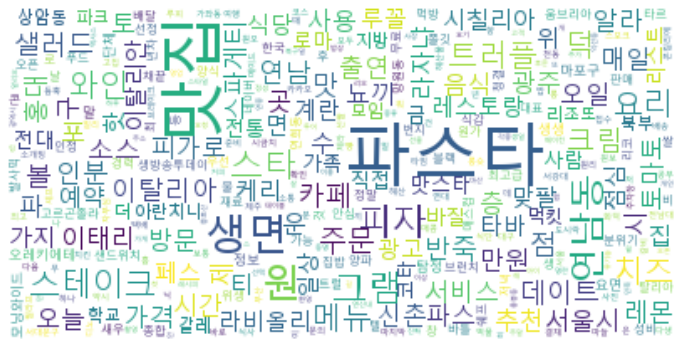

In [48]:
pasta_wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(pasta_wc, interpolation="bilinear")
plt.axis("off")

In [119]:
pasta_1 = pasta.copy()

In [120]:
pasta_1.head()

,UserId,Contents,Tags,Like
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [121]:
pasta_1["Contents"] = pasta_1["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [122]:
pasta_1.head()

,UserId,Contents,Tags,Like
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [124]:
pasta_1["Tags"] = pasta_1["Tags"].str.strip("]['")

In [127]:
pasta_1["Tags"] = pasta_1["Tags"].str.replace("'", repl=r"", regex=True)

In [128]:
pasta_1.head()

,UserId,Contents,Tags,Like
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",1368
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",147
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",213
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",149


In [155]:
pasta_1[pasta_1["Contents"].str.contains("")]

,UserId,Contents,Tags,Like
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",1368
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",147
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",213
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",149
...,...,...,...,...
989,anwoowna,맛있는 파스타 달콤한 호떡 꿀맛 과일 좋아요 여전히 노을은 경이롭고 아름답다...,"#아름답다, #긍정을믿습니다, #한국, #Korea, #서울, #Seoul, #한강...",11
990,ykhwa82,점심 점심메뉴 방학중 친구랑 파스타 스테이크 샐러드 피자에 청량고추 야미야미 너...,"#점심, #점심메뉴, #방학중, #친구랑, #파스타, #스테이크, #샐러드, #피자...",11
991,wonju.dennis.lee,대구 나들이 일상 서양면옥 맛집 맛스타그램 파스타 장조림파스타 신세계 백화점 쇼핑,"#대구, #나들이, #일상, #서양면옥, #맛집, #맛스타그램, #파스타, #장조림...",19
992,dalcongsfm,애들은 먼저 주고퇴근해서 온 남편이랑 나랑 따로 먹은 저녁ㅎ오꼬노미야끼를 애들먹었...,"#해물로제파스타, #명란파스타땡초넣고, #유아식, #유아식단, #어린이식단, #식판...",63


In [173]:
text = "가로수길맛집"

In [174]:
print(re.match("맛집",text))

None


In [ ]:
# 프로필로 들어가기
driver.find_element(By.CLASS_NAME, "_aaqt").click()

time.sleep(3)

# 게시물, 팔로워, 팔로우
info = driver.find_elements(By.CLASS_NAME,"xl565be")
num=[]
post = []
follower = []
follow = []
for i in info:
    inf = i.text
    inff = re.findall("\S+",inf)
    num.append((inff[1]))
    
time.sleep(8)

post.append(num[0])
follower.append(num[1])
follow.append(num[2])

In [ ]:
# 게시물, 팔로워, 팔로우

def searching(user):
    url = 'https://www.instagram.com/'+user
    return url

id = pasta["UserId"].copy()

for i in range(len(id)):
    url= searching(id[i])
    driver.get(url)
    time.sleep(5)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    info = soup.select('ul.xieb3on> li')

    post = info[0].find("span").get_text()
    follower = info[1].find("span").get_text()
    follow = info[2].find("span").get_text()
        
info_list = []

In [57]:
id = pasta["UserId"].copy()

In [58]:
searching(id)

0           https://www.instagram.com/wonyyday_
1           https://www.instagram.com/jmpsehanx
2           https://www.instagram.com/jo.a_menu
3        https://www.instagram.com/mari_mukkkkk
4       https://www.instagram.com/yyoasdmfk0214
                         ...                   
992        https://www.instagram.com/dalcongsfm
993           https://www.instagram.com/viudnie
994      https://www.instagram.com/hwangdayun71
995    https://www.instagram.com/myfoodrecords_
996            https://www.instagram.com/ltl0yl
Name: UserId, Length: 997, dtype: object

In [84]:
info_list = []
def info(driver):
    for i in range(len(id)):
        url= searching(id[i])
        driver.get(url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        info = soup.select('ul.xieb3on> li')

        post = info[0].find("span").get_text()
        follower = info[1].find("span").get_text()
        follow = info[2].find("span").get_text()
    
    

485
141
990


KeyboardInterrupt: 

In [ ]:
[<li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <div class="_aacl _aacp _aacu _aacx _aad6 _aade">게시물 
 <span class="_ac2a"><span>485</span></span></div></li>, 
 
 <li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <a class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd" href="/wonyyday_/followers/" role="link" tabindex="0"><div class="_aacl _aacp _aacu _aacx _aad6 _aade">
 팔로워 <span class="_ac2a" title="4.3만">
 <span>4.3만</span></span></div></a></li>, 
 
 <li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <a class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd" href="/wonyyday_/following/" role="link" tabindex="0"><div class="_aacl _aacp _aacu _aacx _aad6 _aade">
 팔로우 <span class="_ac2a">
 <span>1409</span></span></div></a></li>]